# Import Packages and Data set

In [1]:
import pandas as pd
import numpy as np 
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as shc
main_df = pd.read_csv('winequality-red.csv', sep=",", encoding="ISO-8859-1", header=0)
main_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
main_df.shape

(1599, 12)

In [3]:
main_df = main_df.dropna()
print(main_df.shape)
main_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
main_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
main_df_copy = main_df.copy()
# fit_transform
main_df_copy = scaler.fit_transform(main_df_copy)
main_df_copy.shape

(1599, 12)

In [6]:
main_df_columns = []
for col in main_df.columns:
    main_df_columns.append(col)

main_df_copy = pd.DataFrame(main_df_copy)
main_df_copy.columns = main_df_columns
main_df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


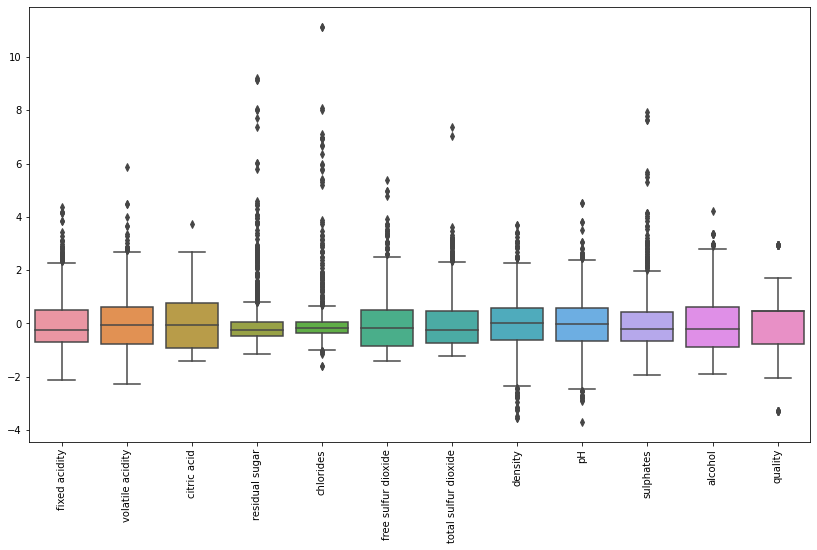

In [7]:
plt.figure(figsize=(14,8))
sns.boxplot(data = main_df_copy)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

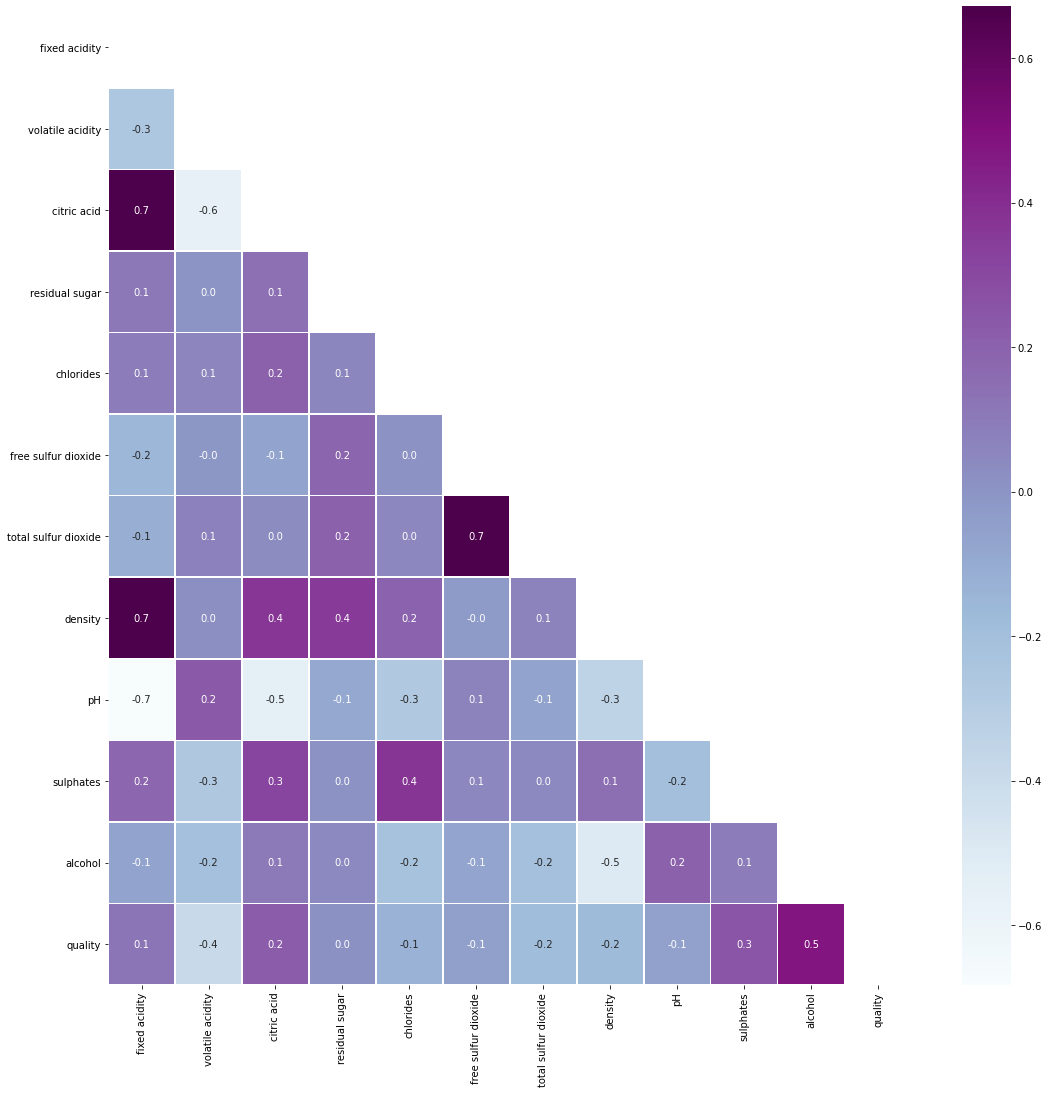

In [8]:
f, ax = plt.subplots(figsize=(18,18))
matrix = np.triu(main_df_copy.corr())
sns.heatmap(main_df_copy.corr(), annot=True, linewidth=.5, fmt='.1f',
           ax=ax, mask=matrix,cmap="BuPu")

In [9]:
# ['fixed acidity','volatile acidity','citric acid','residual sugar',
#        'chlorides','free sulfur dioxide','total sulfur dioxide','density',
#        'pH','sulphates','alcohol','quality']

C:\Users\44741\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


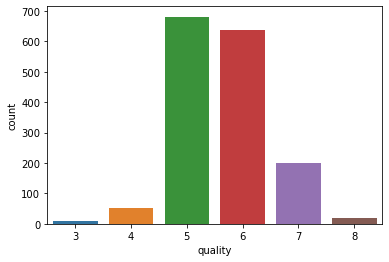

In [10]:
sns.countplot(main_df['quality'],label="Count")    
three, four, five, six, seven, eight = main_df['quality'].value_counts()

In [11]:
main_df_copy=main_df_copy.drop(['fixed acidity','residual sugar',
                                'chlorides','free sulfur dioxide',
                                'pH'],axis=1)

<AxesSubplot:>

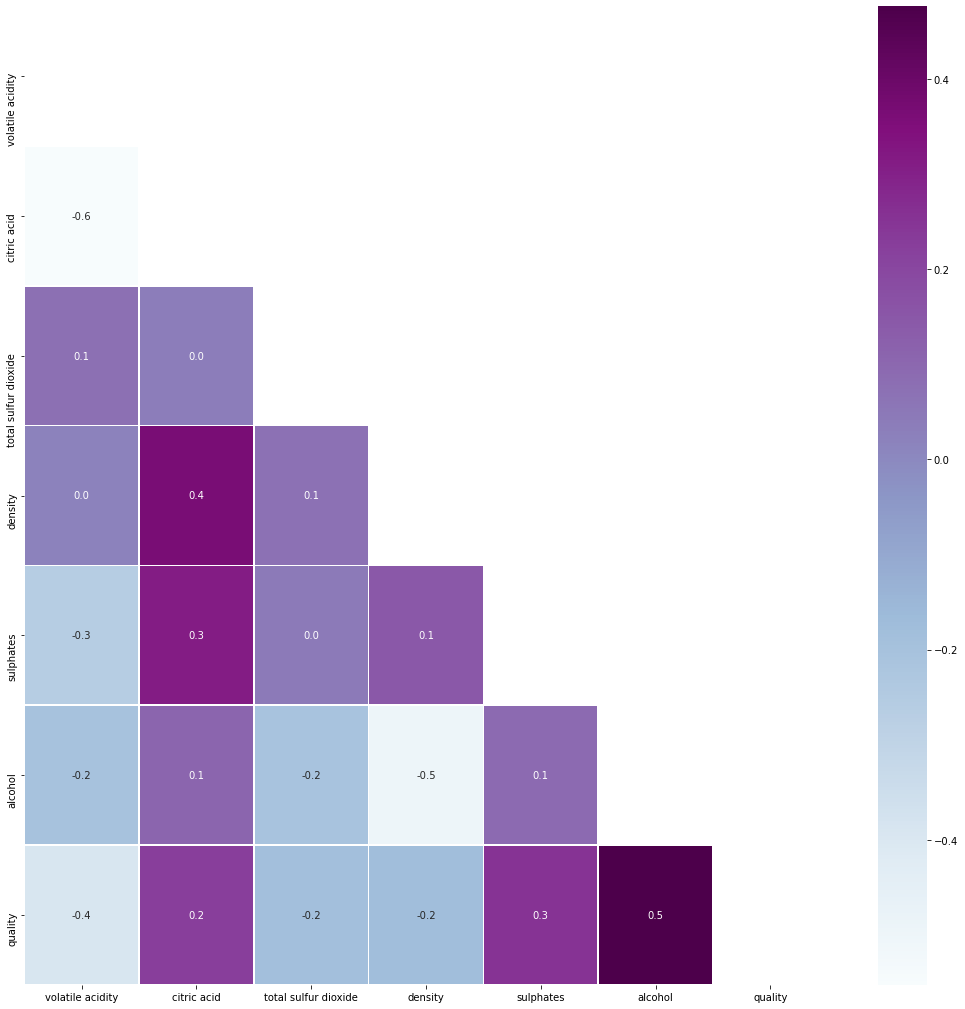

In [12]:
f, ax = plt.subplots(figsize=(18,18))
matrix = np.triu(main_df_copy.corr())
sns.heatmap(main_df_copy.corr(), annot=True, linewidth=.5, fmt='.1f',
           ax=ax, mask=matrix,cmap="BuPu")

In [13]:
#main_df_copy=main_df_copy.drop(['density','total sulfur dioxide','citric acid'],axis=1)
#f, ax = plt.subplots(figsize=(18,18))
#matrix = np.triu(main_df_copy.corr())
#sns.heatmap(main_df_copy.corr(), annot=True, linewidth=.5, fmt='.1f',
#           ax=ax, mask=matrix,cmap="BuPu")

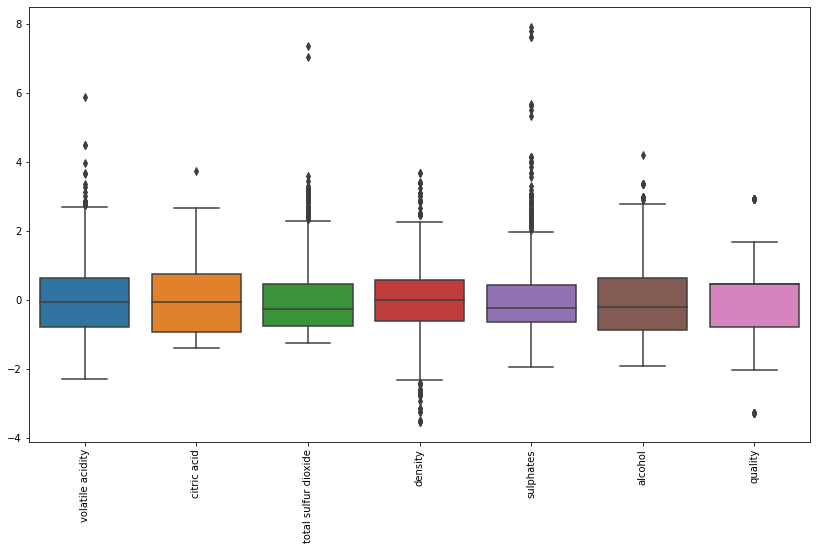

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(data = main_df_copy)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

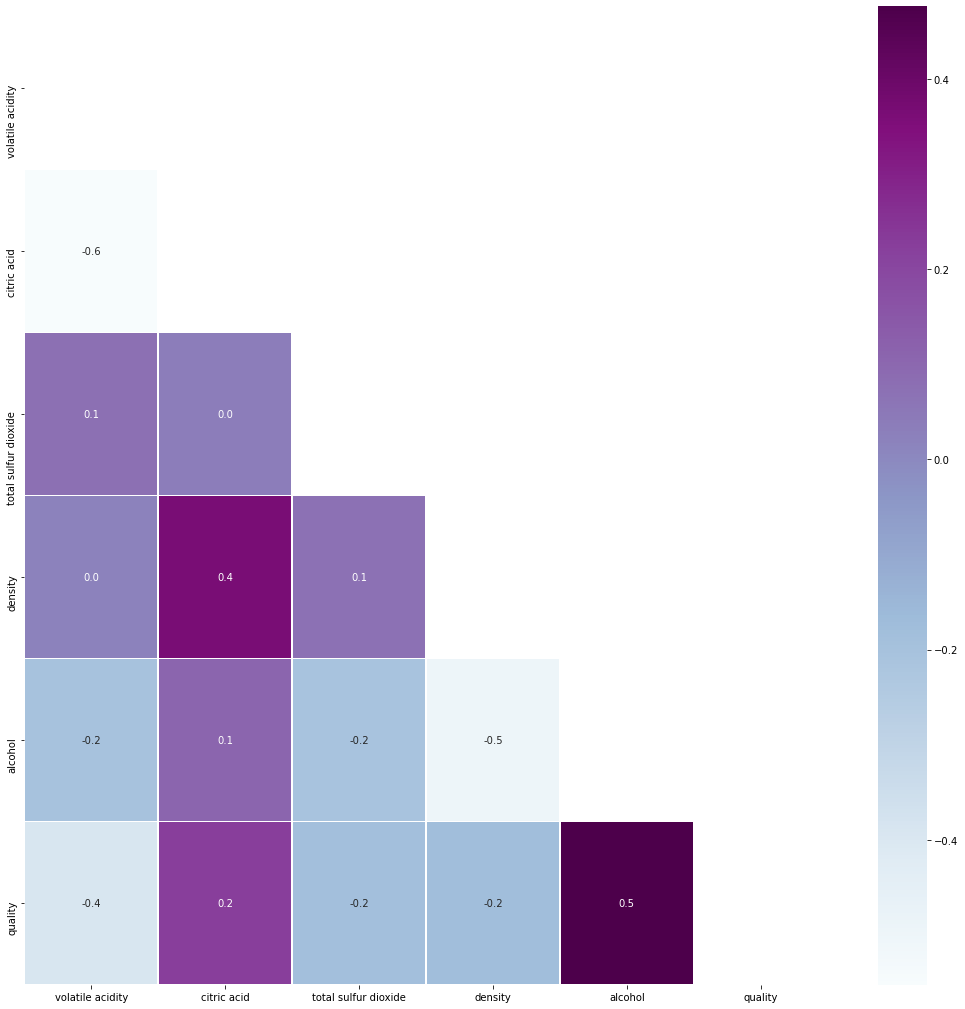

In [15]:
main_df_copy=main_df_copy.drop(['sulphates'],axis=1)
f, ax = plt.subplots(figsize=(18,18))
matrix = np.triu(main_df_copy.corr())
sns.heatmap(main_df_copy.corr(), annot=True, linewidth=.5, fmt='.1f',
           ax=ax, mask=matrix,cmap="BuPu")

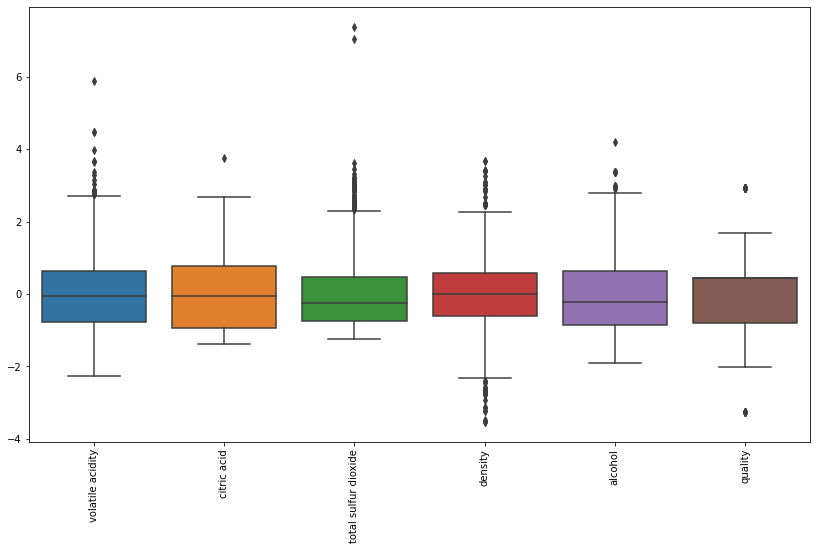

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(data = main_df_copy)
plt.xticks(rotation=90)
plt.show()

In [17]:
np.unique(main_df[['quality']].values)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [18]:
pca = PCA(n_components=2)
x_pca=pca.fit_transform(main_df_copy)
x_pca.shape

(1599, 2)

In [19]:
x_pca

array([[ 1.87352142,  0.57946458],
       [ 2.26288223,  1.21762728],
       [ 1.81214752,  0.85402003],
       ...,
       [-0.51211835,  0.94586661],
       [ 0.91650716,  1.04151513],
       [-1.62239806, -0.44037109]])

In [20]:
x_pcaDf = pd.DataFrame(data = x_pca, columns= ['pc1', 'pc2'])
pcaDf = pd.concat([x_pcaDf, main_df_copy[['quality']]], axis = 1)
pcaDf.head()

,pc1,pc2,quality
0,1.873521,0.579465,-0.787823
1,2.262882,1.217627,-0.787823
2,1.812148,0.854020,-0.787823
3,-0.826068,-2.048961,0.450848
4,1.873521,0.579465,-0.787823


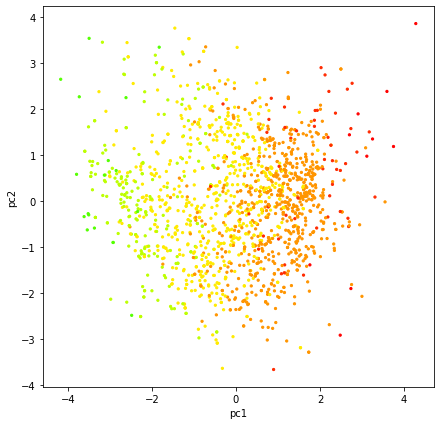

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(pcaDf['pc1'],pcaDf['pc2'],c=pcaDf['quality'],cmap='prism', s =5)
plt.xlabel('pc1') 
plt.ylabel('pc2')
plt.show()

In [22]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)
X = x_pcaDf
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'),axis=1)) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
                       
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'),axis=1)) / X.shape[0]
    
    mapping2[k] = kmeanModel.inertia_

C:\Users\44741\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [23]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.7475824451315654
2 : 1.3263732684750744
3 : 1.0911367065631454
4 : 0.9298740764531759
5 : 0.8438849239785784
6 : 0.7821766112564986
7 : 0.734555409326285
8 : 0.6950876142754905
9 : 0.6575326316520739
10 : 0.6249706913780715


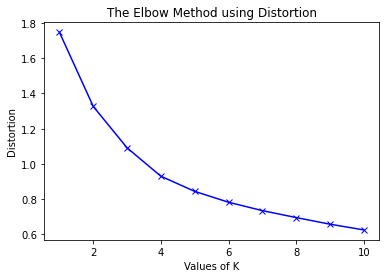

In [24]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [25]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 5953.987273005042
2 : 3669.6984969199375
3 : 2406.458093661266
4 : 1783.8707092111913
5 : 1487.5205720073307
6 : 1259.1874398137516
7 : 1095.5495849242802
8 : 966.1875090906308
9 : 874.7595032787164
10 : 787.575763611999


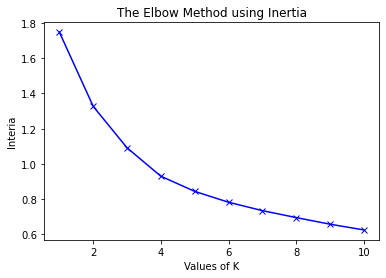

In [26]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Interia')
plt.title('The Elbow Method using Inertia')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3755541403251244
For n_clusters = 3 The average silhouette_score is : 0.37752578056334796
For n_clusters = 4 The average silhouette_score is : 0.3802724968087999
For n_clusters = 5 The average silhouette_score is : 0.3500322801620291
For n_clusters = 6 The average silhouette_score is : 0.3608128191358409
For n_clusters = 7 The average silhouette_score is : 0.3380251777150752
For n_clusters = 8 The average silhouette_score is : 0.34935191439948043


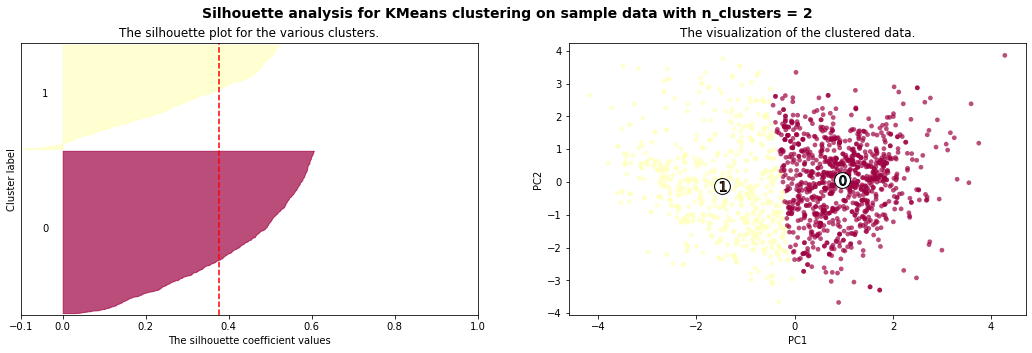

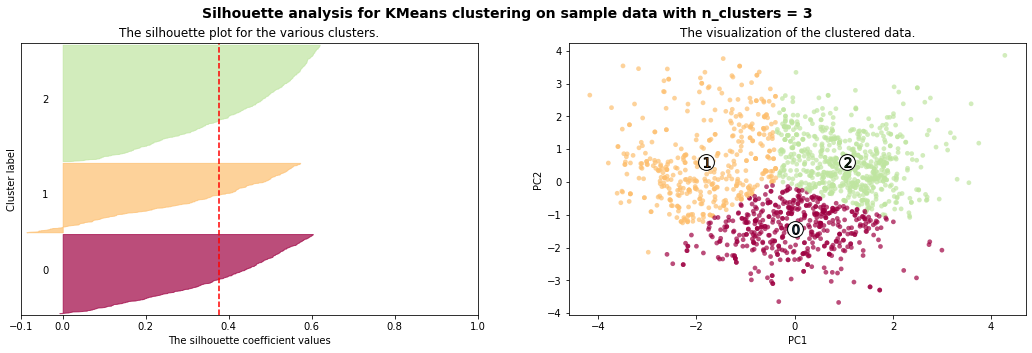

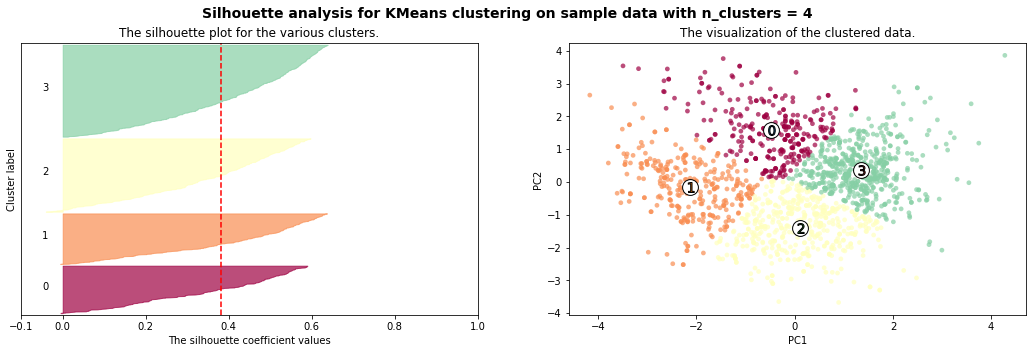

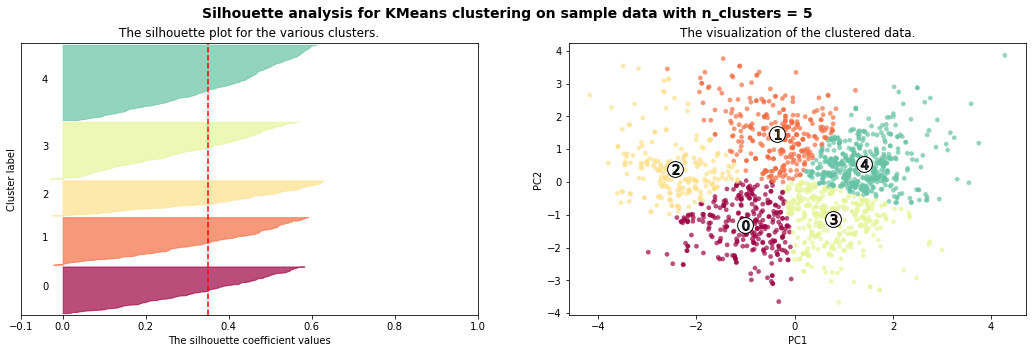

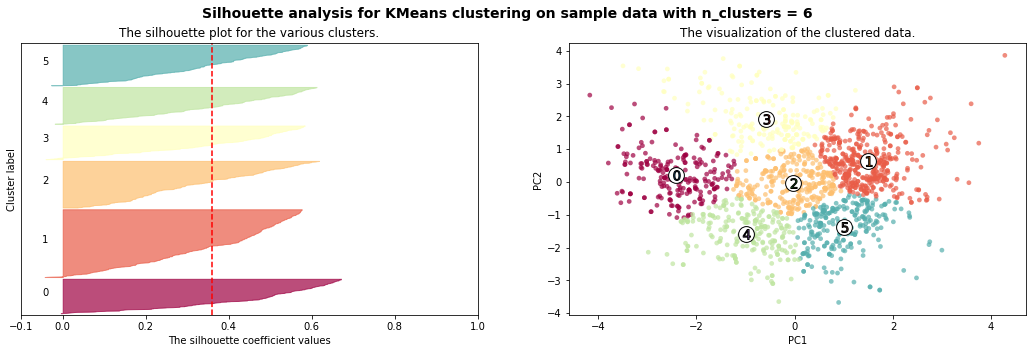

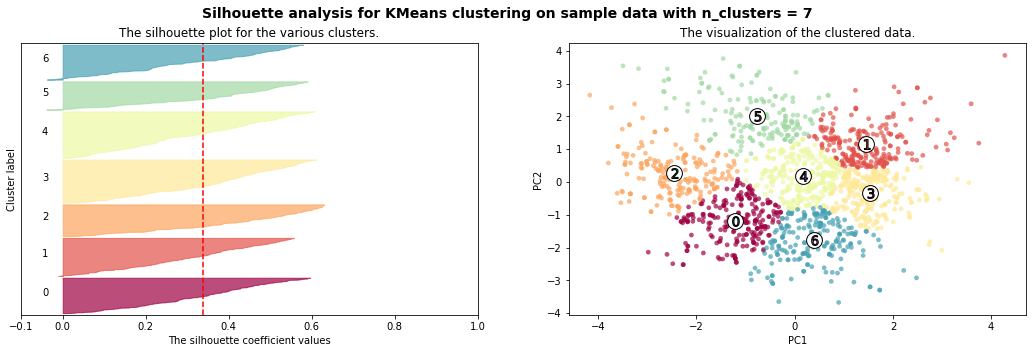

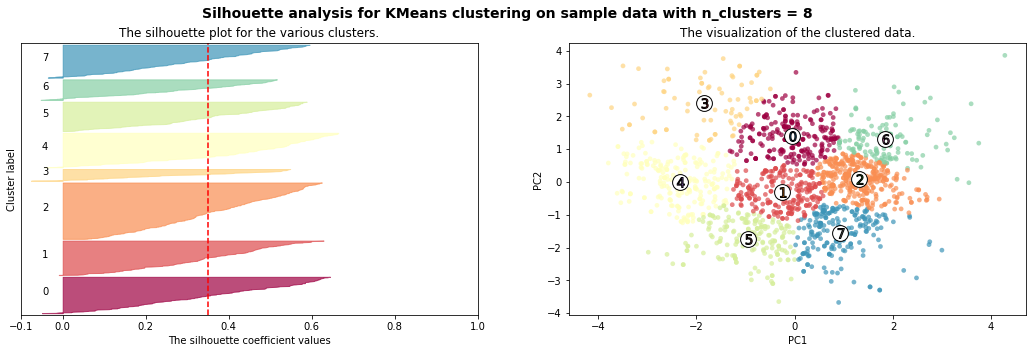

In [27]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

pca_2d = PCA(n_components=2)
pca_2d_r = pca_2d.fit_transform(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=9000)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d_r[:, 0], pca_2d_r[:, 1], marker='.', s=90, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = pca_2d.transform(centers)
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=250, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [28]:
np.unique(main_df[['quality']].values)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [53]:
# 3 clusters
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
#Initialize the class object
label = kmeans.fit_predict(X)
print(label)

[2 2 2 ... 4 2 5]


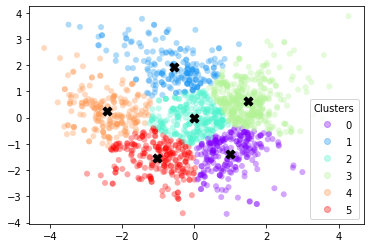

In [54]:
y_kmeans = kmeans.fit_predict(x_pca)


# Get centroids
centroids = kmeans.cluster_centers_

k = plt.scatter(x_pca[:,0],x_pca[:,1],  c = y_kmeans, cmap = "rainbow", edgecolor = "None", alpha=0.35)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black', marker = 'X')
plt.legend(*k.legend_elements(), title='Clusters')

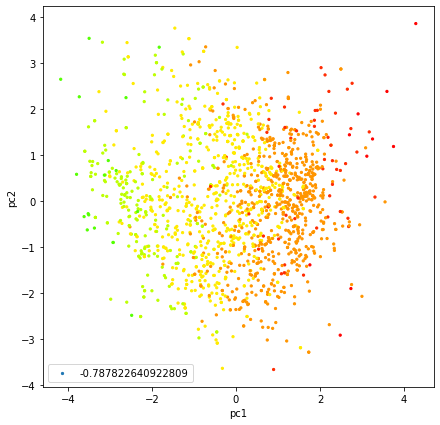

In [55]:
plt.figure(figsize=(7,7))
plt.scatter(pcaDf['pc1'],pcaDf['pc2'],c=pcaDf['quality'],cmap='prism', s =5)
plt.xlabel('pc1') 
plt.ylabel('pc2')
plt.legend(pcaDf['quality'])
plt.show()

In [56]:
from sklearn.metrics.cluster import homogeneity_score
ho_score = homogeneity_score(main_df['quality'], y_kmeans)
print(ho_score)

0.296684221928499


In [57]:
from sklearn.metrics.cluster import completeness_score
comp_score = completeness_score(main_df['quality'], y_kmeans)
print(comp_score)

0.19987782063209922


# HIERARCHICAL

###### Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy.

In [35]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [36]:
from sklearn.preprocessing import normalize
normalized_df = normalize(main_df)
normalized_df = pd.DataFrame(normalized_df)
pca = PCA(n_components = 2)
X_princ = pca.fit_transform(normalized_df)
X_princ = pd.DataFrame(X_princ)
X_princ.columns = ['P1','P2']
X_princ.head()

,P1,P2
0,-0.062260,-0.029312
1,-0.219391,0.030261
2,-0.179919,-0.057944
3,-0.170658,-0.057655
4,-0.062260,-0.029312


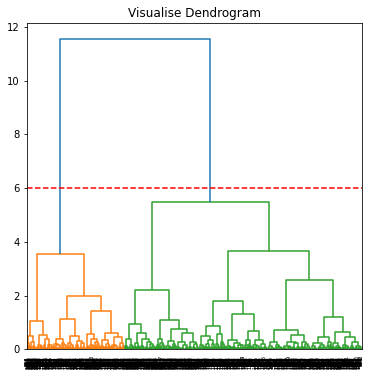

In [37]:
plt.figure(figsize=(6,6))
plt.title('Visualise Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(X_princ, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Text(0, 0.5, 'Silhouette Score')

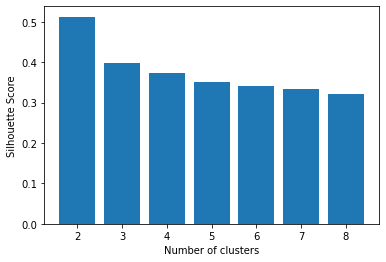

In [38]:
silhouette_scores = [] 
for n_cluster in range(2,9):
    silhouette_scores.append(
    silhouette_score(X_princ,AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_princ)))
# Plotting a bar graph to compare the results
k = [2,3,4,5,6,7,8]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)

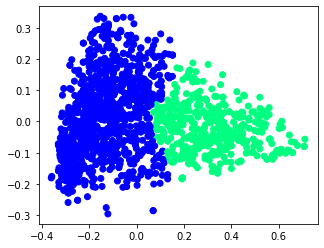

In [39]:
agg = AgglomerativeClustering(n_clusters = 6)
agg.fit_predict(X_princ)
plt.figure(figsize=(5,4))
plt.scatter(X_princ['P1'],X_princ['P2'],
            c= AgglomerativeClustering(n_clusters = 2).fit_predict(X_princ),
            cmap = plt.cm.winter)
plt.show()

In [42]:
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelled_data = labelencoder.fit_transform(main_df['quality'])
agg = AgglomerativeClustering(n_clusters = 2).fit_predict(X_princ)
ho_score = homogeneity_score(labelled_data, agg)
print(ho_score)
comp_score = completeness_score(labelled_data, agg)
print(comp_score)

0.019131604474653688
0.03748970857087924
